# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [21]:
import glob 

In [22]:
files = glob.glob("DocCol2/*")  # vamos utilizar os documentos que estão no diretório DocCol2
files[0]

'DocCol2\\au1'

In [23]:
ddocs = {}
for fname in files:
    key = fname.split('\\')[-1]  # rotulo do documento => define a chave do dicionário
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        words = f.read()
        ddocs[key] = words

print(ddocs.keys(), '\n')
print(list(ddocs.keys())[0],'-->',ddocs[list(ddocs.keys())[0]]) # imprime a chave e o valor no índice [0] da lista

dict_keys(['au1', 'au10', 'au11', 'au12', 'au13', 'au14', 'au15', 'au2', 'au3', 'au4', 'au5', 'au6', 'au7', 'au8', 'au9', 'ch1', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch2', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch3', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch4', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch5', 'ch50', 'ch6', 'ch7', 'ch8', 'ch9', 'gr1', 'gr10', 'gr11', 'gr12', 'gr13', 'gr14', 'gr15', 'gr16', 'gr17', 'gr18', 'gr19', 'gr2', 'gr20', 'gr21', 'gr22', 'gr23', 'gr24', 'gr25', 'gr26', 'gr3', 'gr4', 'gr5', 'gr6', 'gr7', 'gr8', 'gr9']) 

au1 --> From: ssave@ole.cdac.com (The Devil Reincarnate)
Subject: Re: Was "Re: Safety": From how far can you see a car ?

In article <C4rvKM.367@plato.ds.boeing.com> simnet@plato.ds.boeing.com (Mark R Poulson) writes:
>ssave@ole.cdac.com (The Devil Reincarnate) writes:
>> You will be 

### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [24]:
import nltk


In [25]:
# obtendo palavras do documento com word_tokenize, concatenando em uma string única

words=''
for k,v in ddocs.items():
    words = words + v                  # obtém uma string única
    
words = nltk.word_tokenize(words)      # tokenizando e criando lista de palavras

print(words[0:10])

['From', ':', 'ssave', '@', 'ole.cdac.com', '(', 'The', 'Devil', 'Reincarnate', ')']


### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [26]:
import string

# .lower: coloca todas as letras em minúsculas
# .isalpha() remove todos os simbolos que não são letras do alfabeto
# not in string.ascii_letters: remove todas as strings com apenas uma letra
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters]
# words = [w.lower() for w in words if w.isalpha() and len(w) != 1] # código alternativo

print(words[0:10])

['from', 'ssave', 'the', 'devil', 'reincarnate', 'subject', 're', 'was', 're', 'safety']


### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [27]:
from nltk.corpus import stopwords


In [28]:
# removendo stop words (palavras sem significado semântico útil)

# lista das stop words
stop_words = stopwords.words('english')
print('Stopwords removidas:\n', stop_words[:5])

words = [w for w in words if w not in stop_words]
print('Palavras Relevantes:\n',words[:20])

Stopwords removidas:
 ['i', 'me', 'my', 'myself', 'we']
Palavras Relevantes:
 ['ssave', 'devil', 'reincarnate', 'subject', 'safety', 'far', 'see', 'car', 'article', 'simnet', 'mark', 'poulson', 'writes', 'ssave', 'devil', 'reincarnate', 'writes', 'surprised', 'number', 'people']


### Exercício 5) 
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [19]:
from nltk.stem import PorterStemmer


In [29]:
# stemming: guardando apenas a raiz das palavras

n_antes = len(words)
print('Número de palavras antes da remoção:', n_antes)
words = [PorterStemmer().stem(w) for w in words]       # stemming
words = list(set(words))                               # remove as palavras repetidas com set()
n_depois = len(words)
print('Foram removidas ',n_antes-n_depois,' palavras')

print('Número de palavras após a remoção:', len(words),words[:20])

47220
Foram removidas  40446  palavras
6774 ['scene', 'conductor', 'eg', 'gentl', 'virtu', 'destroy', 'distinguish', 'protocol', 'regardless', 'justin', 'bizarr', 'cours', 'center', 'boot', 'neutral', 'neg', 'bump', 'vanish', 'submiss', 'adriaansen']


### Exercício 6) 
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

In [31]:
docsXwords = {}

for k,v in ddocs.items():
    words = nltk.word_tokenize(v)                        # tokenizando e criando lista de palavras
    words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters] # remove símbolos e 1 letra
    words = [w for w in words if w not in stop_words]    # remove stopwords
    words = [PorterStemmer().stem(w) for w in words]     # stemming sem remover as palavras repetidas
    docsXwords[k] = words
    

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [33]:
# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

# criando dataframe documentosXpalavras df_dXp
df_dXp = pd.DataFrame(data=np.zeros((len(list(ddocs.keys())),len(corpus))),
                      index = list(ddocs.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))       # cria dicionário temporário onde k: palavras e v: contagem
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
print(df_dXp.head())

      scene  conductor   eg  gentl  virtu  destroy  distinguish  protocol  \
au1     0.0        0.0  0.0    0.0    0.0      0.0          0.0       0.0   
au10    0.0        0.0  0.0    0.0    0.0      0.0          1.0       0.0   
au11    0.0        0.0  0.0    0.0    0.0      0.0          0.0       0.0   
au12    0.0        0.0  0.0    0.0    0.0      0.0          0.0       0.0   
au13    0.0        0.0  0.0    0.0    0.0      0.0          0.0       0.0   

      regardless  justin  ...  antiochen  renew  vocal  lindaburi  egyptian  \
au1          0.0     0.0  ...        0.0    0.0    0.0        0.0       0.0   
au10         0.0     0.0  ...        0.0    0.0    0.0        0.0       0.0   
au11         0.0     0.0  ...        0.0    0.0    0.0        0.0       0.0   
au12         0.0     0.0  ...        0.0    0.0    0.0        0.0       0.0   
au13         0.0     0.0  ...        0.0    0.0    0.0        0.0       0.0   

      barnhous  optic  rcc  consist  cush  
au1        0.0    

### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [37]:
docid = {}
for i,c in enumerate(df_dXp.index.values):
   if c[0:2] not in docid:              # as duas letras iniciais do indice (nome do arquivo) indicam o
      docid[c[0:2]] = i                 # tópico ao qual o documento está relacionado (ba:baseball, sp: spatial subjects)
                                        # docid armazena como chave o tópico e valor 
print('Linha da primeira ocorrência:', docid)       # a linha onde aparece pela primeira vez 
        
doc_ids = [docid[c[0:2]] for c in df_dXp.index.values] # cria uma lista de labels indicando
                                                       # a qual topico o documento pertence.  
                                                       # Os labels serão utilizados para colorir
                                                       # os documentos de acordo com seu tópico
X = df_dXp.values                                      # => Pego os atributos e converto para uma array de numpy
X = StandardScaler().fit_transform(X)                  # Aplica uma normalização Z-score (=padronização)
                                                       # nos dados para melhorar o resultado do PCA

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print('Linhas x Colunas após transformação pelo PCA:', Xpca.shape)

Linha da primeira ocorrência: {'au': 0, 'ch': 15, 'gr': 65}
Linhas x Colunas após transformação pelo PCA: (91, 2)


### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


[ 0 15 65]


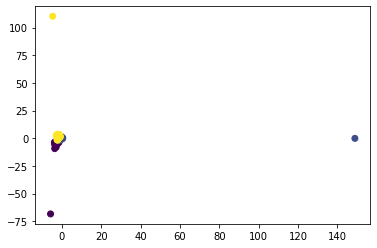

In [43]:
print(np.unique(doc_ids))
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

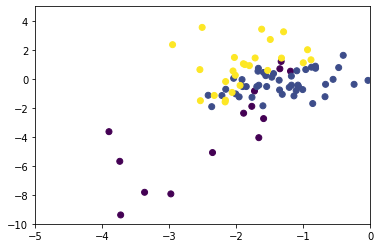

In [44]:
# fazendo zoom

fig, ax = plt.subplots()
ax.set_xlim(-5, 0)
ax.set_ylim(-10, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele. 

In [51]:
# encontrando o indice da linha de 'au8' no DataFrame
au8_id = np.argwhere(df_dXp.index.values=='au8')[0][0]
au8_id

13

In [52]:
X = df_dXp.values
X = StandardScaler().fit_transform(X)

# calculando a similaridade pelo cosseno e utilizando a formula
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosau8 = np.apply_along_axis(lambda x: 
             np.dot(X[au8_id],x)/(np.linalg.norm(au8_id)*np.linalg.norm(x)),1,X)  # calcula o cosseno entre o índice au8
                                                                                  # e todos os demais índices
cosau8

array([ 0.06983122,  0.09023304,  0.05681329,  0.89154395,  0.08475241,
        0.21188547,  0.79138019, -0.10506966, -0.10387317, -0.12822151,
        0.12503376,  0.05313075,  3.24231686,  6.7538329 , -0.098155  ,
       -0.14529646, -0.1648905 , -0.23191241, -0.17261066, -0.17170867,
       -0.19215803, -0.15401837, -0.18351277, -0.1776609 , -0.1781697 ,
       -0.08534541, -0.18059266, -0.15490637, -0.15672715, -0.17780393,
       -0.1561258 , -0.25896059, -0.17524163, -0.24473975, -0.2309373 ,
       -0.16083431, -0.16360477, -0.21589868, -0.22210132, -0.2177315 ,
       -0.23568757, -0.20737274, -0.11363167, -0.20104074, -0.17312642,
       -0.19388909, -0.15402032, -0.11549566, -0.09763515, -0.26394422,
       -0.05271023, -0.19773894, -0.11665035, -0.22466682, -0.10196432,
       -0.13201352, -0.22365901, -0.18140035, -0.22197549, -0.17835442,
       -0.21826508, -0.20154014, -0.13428047, -0.18661208, -0.19770733,
       -0.15046421, -0.20086153, -0.09866037, -0.14816641, -0.14

In [56]:
# distância = 1 - similaridade, por isso a menor distância está na posição [-1]
# ordenando e pegando o maior valor (note que o elemento [-1] é o próprio documento au8)
sim_au8_id = np.argsort(cosau8)#[-2]     # argsort retorna o índice ordenado pelo argumento ()
                                         # [-1] é o próprio índice au8   
print(sim_au8_id)

sim_au8_id = sim_au8_id[-2]              # [-2] é o documento mais parecido

print('Indice do documento mais parecido:', sim_au8_id)
print('Documento mais parecido com au8: ',df_dXp.index.values[sim_au8_id])

[49 31 33 40 17 34 53 56 38 58 60 39 37 41 61 43 66 51 64 87 45 20 63 22
 57 26 59 24 29 23 32 88 44 70 18 19 16 81 36 35 86 79 28 30 27 46 21 84
 89 65 68 69 15 83 73 80 74 62 76 55  9 77 52 47 42  7  8 54 85 67 14 48
 71 72 25 75 90 50 78 82 11  2  0  4  1 10  5  6  3 12 13]
Indice do documento mais parecido: 12
Documento mais parecido com au8:  au7


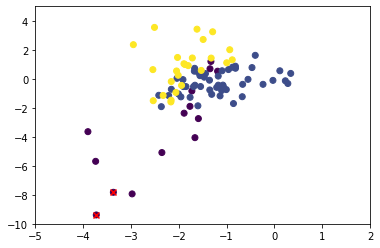

In [59]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

# au8 e o documento mais parecido estão marcos com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)
plt.scatter(Xpca[[au8_id,sim_au8_id],0],Xpca[[au8_id,sim_au8_id],1],marker='x',color='r') #au8_id=13; sim_au8_id=12

In [63]:
Xpca[[13,12]]

array([[-3.72548685, -9.38942362],
       [-3.36835448, -7.82635326]])